In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import PIL
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading Data from Drive folder.

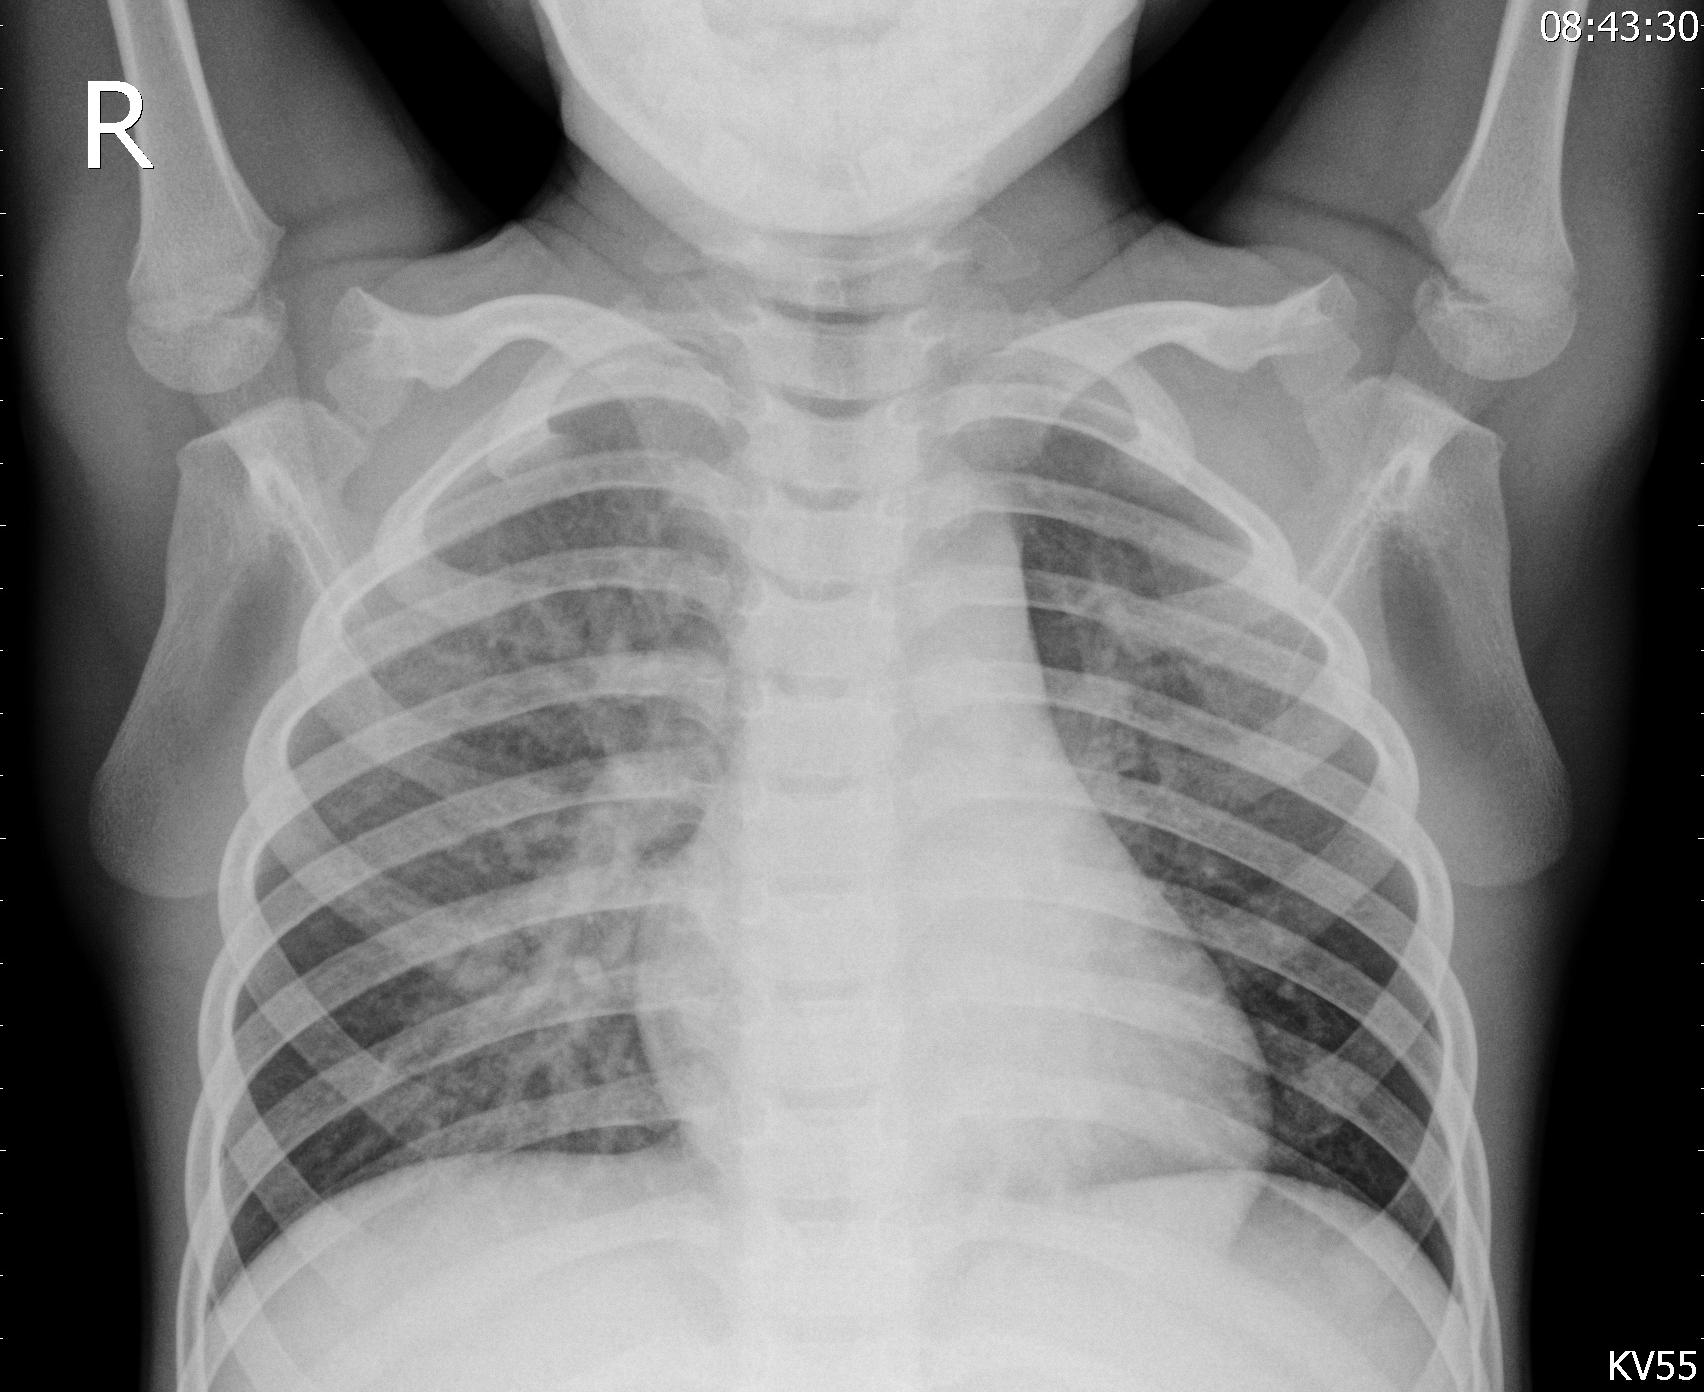

In [ ]:
#sample

image = PIL.Image.open('/content/drive/MyDrive/work/MIP/Project_Data/train/PNEUMONIA/person1509_bacteria_3951.jpeg')
image

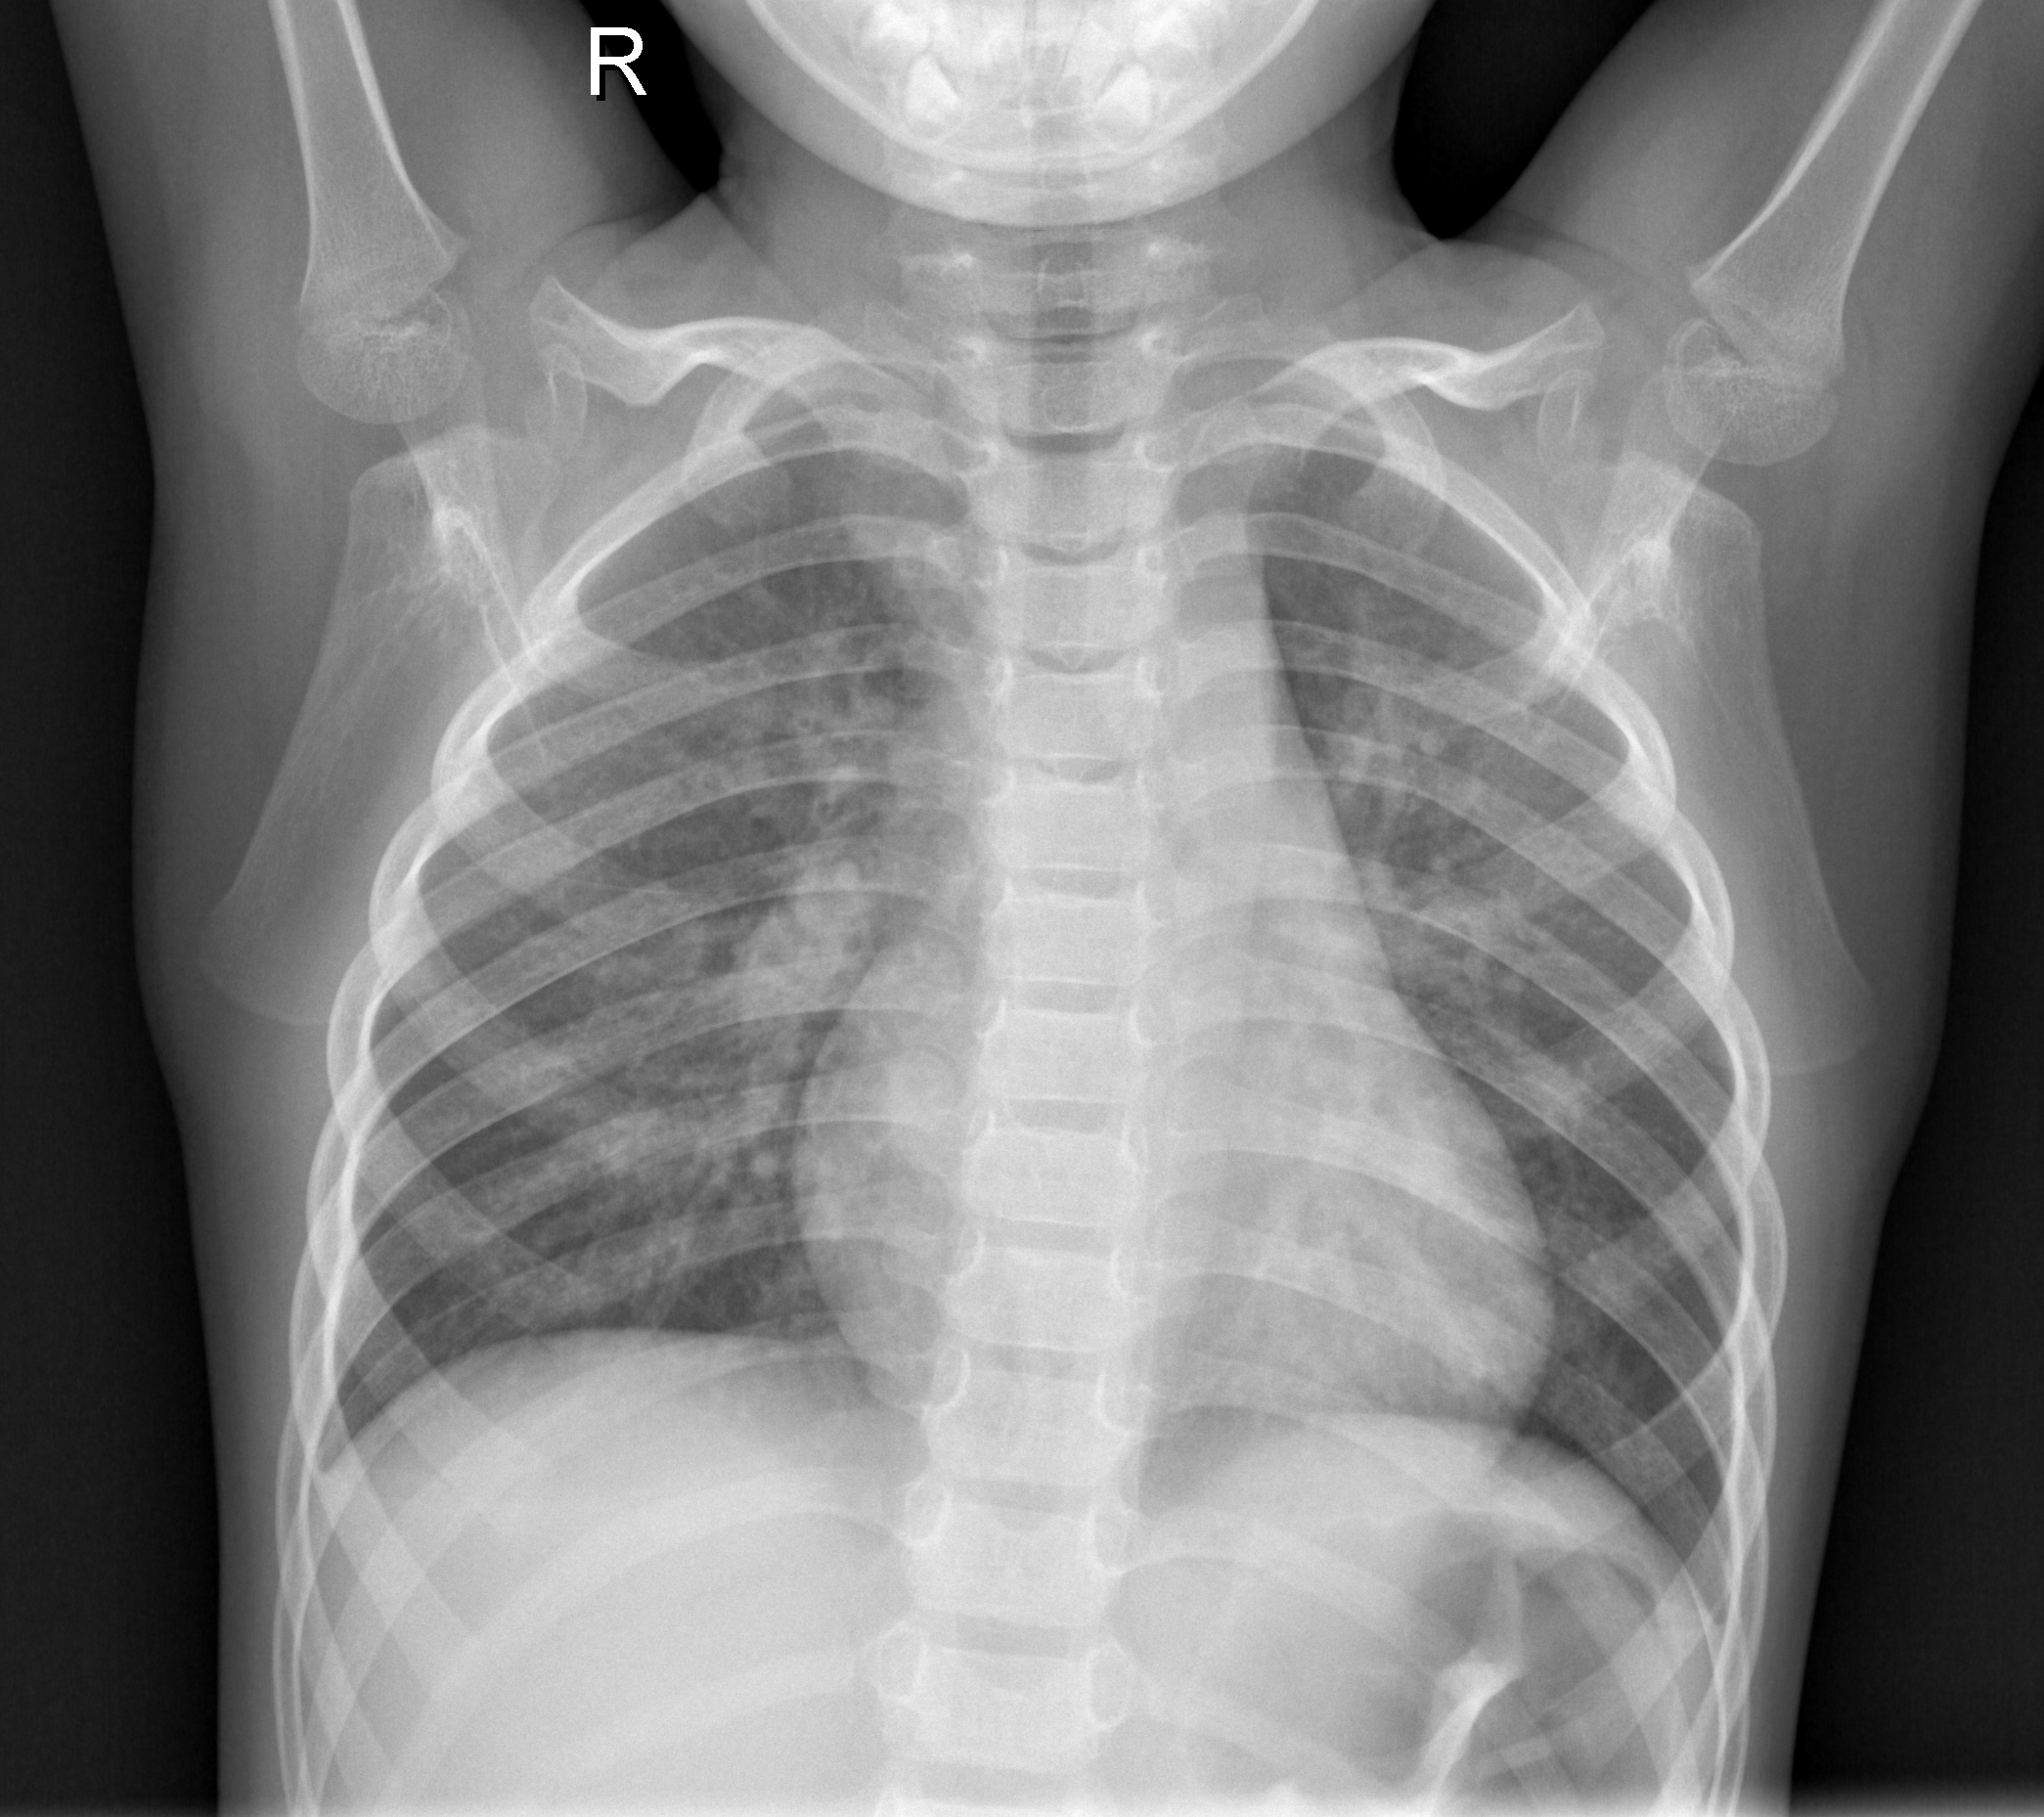

In [ ]:
# Person with Normal Lungs

image_normal = PIL.Image.open('/content/drive/MyDrive/work/MIP/Project_Data/train/NORMAL/IM-0115-0001.jpeg')
image_normal

In [3]:
train_dir = '/content/drive/MyDrive/work/MIP/Project_Data/train'
training_generator = ImageDataGenerator(rescale = 1/255)
train_data = training_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 3465 images belonging to 2 classes.


In [4]:
valid_dir = '/content/drive/MyDrive/work/MIP/Project_Data/val'
validation_generator = ImageDataGenerator(rescale = 1/255)
valid_data = validation_generator.flow_from_directory(valid_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [5]:
test_dir = '/content/drive/MyDrive/work/MIP/Project_Data/test'
testing_generator = ImageDataGenerator(rescale = 1/255)
test_data = testing_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.


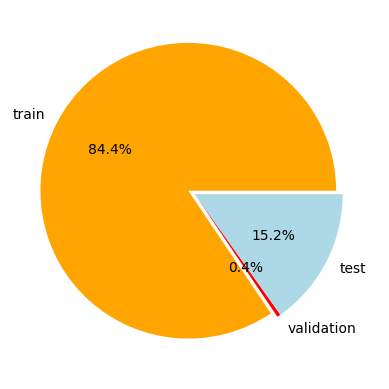

In [6]:
train_samples = len(train_data)
validation_samples = len(valid_data)
test_samples = len(test_data)

plt.pie([train_samples, validation_samples, test_samples],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.show()

### Bulding a Basic CNN model.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

#### CAUTION! Look the Code block(s) unerneath this one.

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
291/291 [==============================] - 580s 2s/step - loss: 0.3670 - acc: 0.9151 - val_loss: 1.8745 - val_acc: 0.5000
Epoch 2/10
291/291 [==============================] - 106s 364ms/step - loss: 0.2902 - acc: 0.9160 - val_loss: 0.6127 - val_acc: 0.8125
Epoch 3/10
291/291 [==============================] - 106s 365ms/step - loss: 0.1819 - acc: 0.9410 - val_loss: 1.1243 - val_acc: 0.6250
Epoch 4/10
291/291 [==============================] - 103s 352ms/step - loss: 0.1281 - acc: 0.9591 - val_loss: 2.1191 - val_acc: 0.5000
Epoch 5/10
291/291 [==============================] - 105s 361ms/step - loss: 0.1047 - acc: 0.9638 - val_loss: 1.1578 - val_acc: 0.5000
Epoch 6/10
291/291 [==============================] - 103s 355ms/step - loss: 0.0832 - acc: 0.9681 - val_loss: 1.6630 - val_acc: 0.5625
Epoch 7/10
291/291 [==============================] - 104s 359ms/step - loss: 0.1051 - acc: 0.9664 - val_loss: 0.8279 - val_acc: 0.6875
Epoch 8/10
291/291 [==============================]

### Following steps are taken, so taht we dont have to run the Epocs again once we want to run the code again and if we are happy with the initial model training.

In [ ]:
# Save the entire model to a HDF5 file.
model.save('/content/drive/MyDrive/work/MIP/Project_Data/model.h5')

# Save the model weights to a HDF5 file.
model.save_weights('/content/drive/MyDrive/work/MIP/Project_Data/weights.h5')

In [10]:
# Load the entire model from a HDF5 file.
model = tf.keras.models.load_model('/content/drive/MyDrive/work/MIP/Project_Data/model.h5')

# Load the model weights from a HDF5 file.
model.load_weights('/content/drive/MyDrive/work/MIP/Project_Data/weights.h5')

In [11]:
import seaborn as sns

In [12]:
# prompt: after loading the model back from the drive, how can i calculate the F1 score matrices

from sklearn.metrics import confusion_matrix, f1_score

# Get predictions from the loaded model
predictions = model.predict(test_data)

# Convert predictions to binary values
binary_predictions = [int(round(p[0])) for p in predictions]

# Get true labels from the test data generator
true_labels = test_data.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Calculate the F1 score
f1 = f1_score(true_labels, binary_predictions)

# Print the results
print("Confusion matrix:\n", cm)
print("F1 score:", f1)


78/78 [==============================] - 91s 1s/step
Confusion matrix:
 [[ 26 208]
 [ 51 339]]
F1 score: 0.7235859124866595


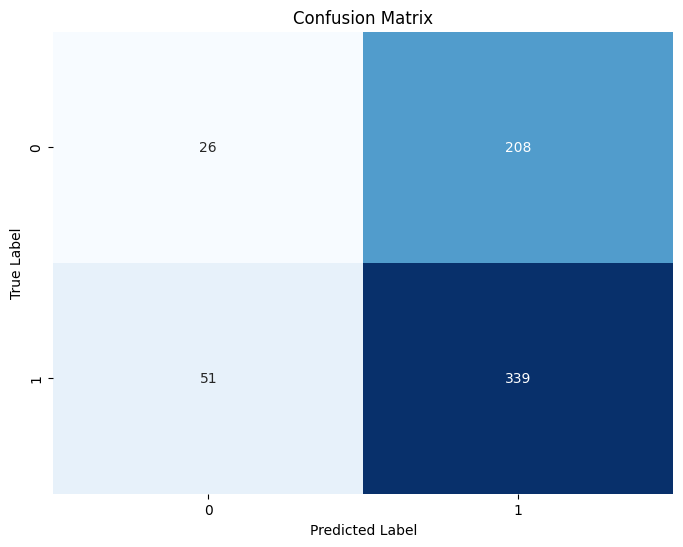

F1 score: 0.7235859124866595


In [13]:
# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print the F1 score
print("F1 score:", f1)

In [14]:
from sklearn.metrics import precision_score, recall_score

# Get the precision and recall scores
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)

# Print the results
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.6197440585009141
Recall: 0.8692307692307693


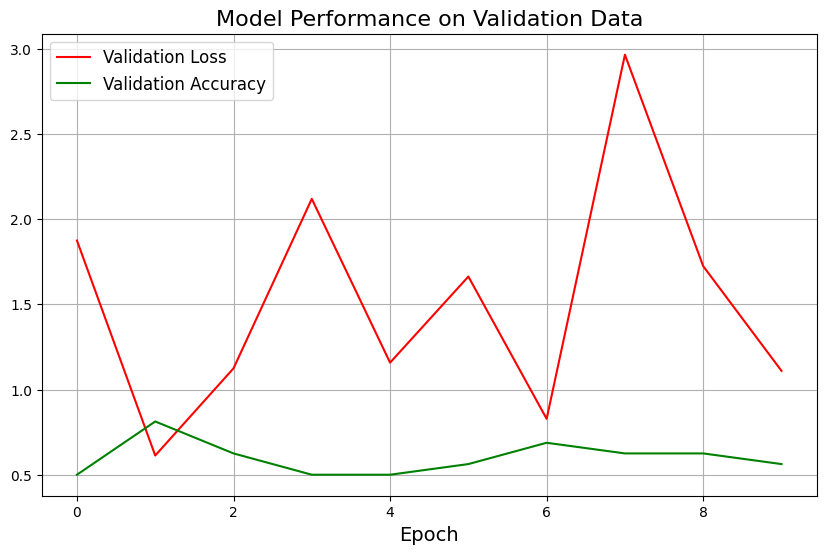

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.plot(history.history['val_acc'], label='Validation Accuracy', color='green')

plt.title('Model Performance on Validation Data', fontsize=16)
plt.xlabel('Epoch', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)
plt.show()

In [ ]:
model.evaluate(test_data)

78/78 [==============================] - 148s 2s/step - loss: 1.0796 - acc: 0.7452


[1.079622745513916, 0.745192289352417]

In [ ]:
predictions = model.predict(test_data)

78/78 [==============================] - 14s 172ms/step


1/1 [==============================] - 0s 323ms/step


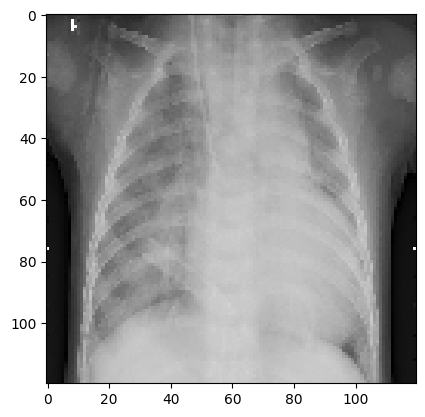

The probability of Pneumonia is:  [0.9999862]


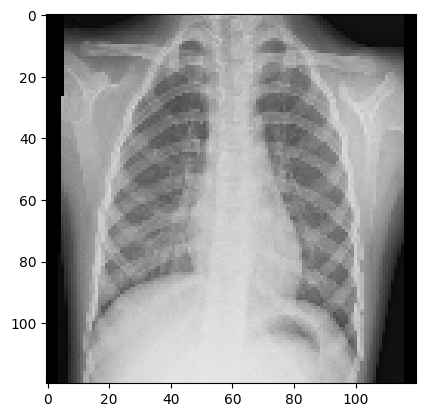

The probability of Pneumonia is:  [0.68971133]


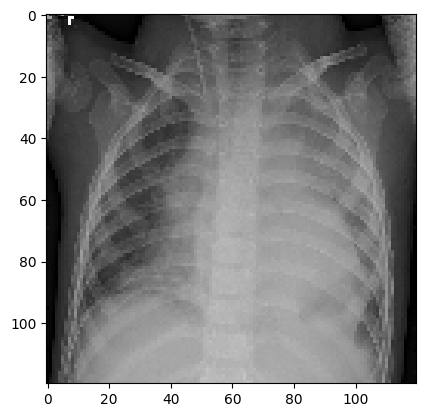

The probability of Pneumonia is:  [0.999949]


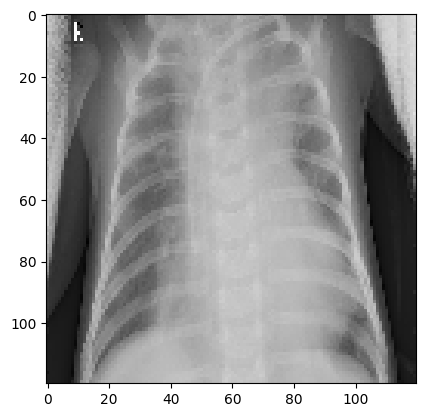

The probability of Pneumonia is:  [0.9999936]


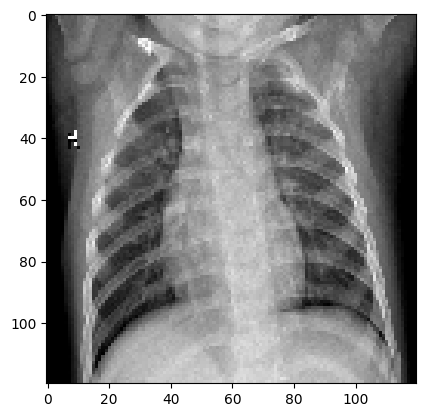

The probability of Pneumonia is:  [0.4980411]


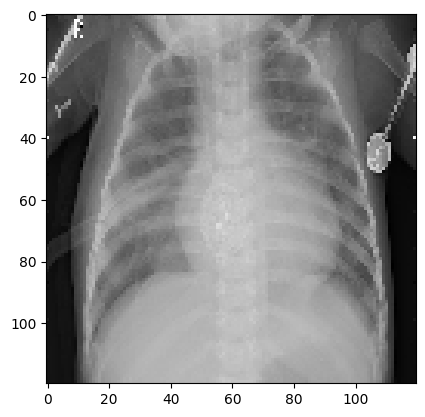

The probability of Pneumonia is:  [0.99999946]


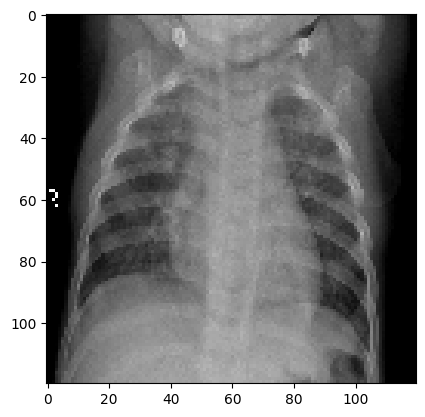

The probability of Pneumonia is:  [0.9997371]


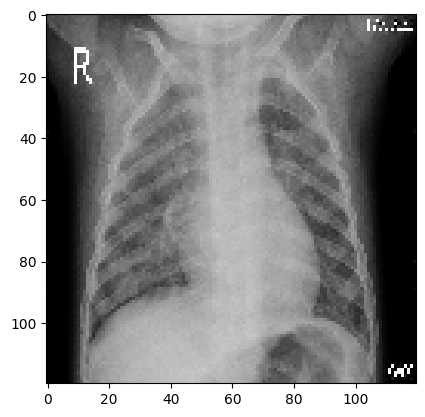

The probability of Pneumonia is:  [0.99998504]


In [ ]:
batch_size = test_data.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test_data)
    predictions = model.predict(x)

    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])